# Introduction

Marketing is extremely critical and crucial for the growth and sustainability of any business. Marketers attempt to build a company's brand, engage customers, grow revenue and increase sales. This is by done by reaching out to new customers, educate and communicate value proposition, and engage with them to understand their needs.

The main key point for marketers is to know their customers ad understand their needs. This is done by performing a market segmentation, dividing a broad group of customers into smaller, more concise groups based on a certain similar characteristic. Some common characteristics for customers such as shared needs, common interests, similar lifestyles, shared geographical locations or even similar demographic profiles.

In this case study, a travel agency has collected extensive data on their customers search habits for two years and if the search resulted in a booking or not (Jan 2013 to Dec 2014). The dataset provided has the following columns:
- date_time: Timestamp
- site_name: ID of Expedia Point of Sale
- posa_continent: ID of continent associated with site_name
- user_location_country: Country where user is located
- user_location_region: Region where user is located
- user_location_city: City where user is located
- orig_destination_distance: distance between hotel and location of user
- user_id: ID of user
- is_mobile: 1 if connected from mobile, 0 otherwise
- is_package: 1 if booking was generated as part of a package, 0 otherwise
- channel: ID of marketing channel
- srch_ci: Checkin date
- srch_co: Checkout date
- srch_adults_cnt: Number of adults for hotel room in search
- srch_children_cnt: Number of children for hotel room in search
- srch_rm_cnt: Number of rooms in search
- srch_destination_id: ID of destination where hotel search was performed
- srch_destination_type_id: Type of destination
- is_booking: 1 if booking, 0 otherwise (Target variable)
- cnt: Number of similar events in the contect of the same user session
- hotel_continent: Continent where hotel is located
- hotel_country: Country where hotel is located
- hotel_market: Market where hotel is located
- hotel_cluster: ID of a hotel cluster

### Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Exploratory Data Analysis
Let's start by reading our dataset

In [2]:
df = pd.read_csv('Dataset/travel.csv')
df.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


In [3]:
df.shape

(100000, 25)

Our dataset consists of 25 features and 100 000 searches. Let's take a look at our numerical statistical data to see if there are any anomalies.

In [4]:
df.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


The numerical columns showcasing IDs can be ignored. The most important information to gather from the table above is the columns have proper minimum and maximums as well as averages that make sense. This applies to our dataset. Now let's look at any mising values we have. 

In [5]:
df.isnull().sum()/len(df)*100

Unnamed: 0                    0.000
date_time                     0.000
site_name                     0.000
posa_continent                0.000
user_location_country         0.000
user_location_region          0.000
user_location_city            0.000
orig_destination_distance    36.085
user_id                       0.000
is_mobile                     0.000
is_package                    0.000
channel                       0.000
srch_ci                       0.122
srch_co                       0.122
srch_adults_cnt               0.000
srch_children_cnt             0.000
srch_rm_cnt                   0.000
srch_destination_id           0.000
srch_destination_type_id      0.000
is_booking                    0.000
cnt                           0.000
hotel_continent               0.000
hotel_country                 0.000
hotel_market                  0.000
hotel_cluster                 0.000
dtype: float64

We have 36.085% missing data for distances between customer and hotel, and 0.122% for both checkin and checkout dates. Let's take a closer look at these. 

In [6]:
df[df['srch_co'].isnull()]

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
753,26946496,2014-06-22 07:47:06,2,3,54,58,31207,NaN,898564,1,0,1,NaN,NaN,2,0,1,15121,3,0,2,6,180,1737,38
1360,20864197,2013-04-13 17:21:20,17,1,133,31,29905,NaN,356874,0,0,0,NaN,NaN,2,1,1,21576,6,0,2,6,208,1798,53
1539,8869536,2014-12-28 19:16:12,2,3,66,363,31138,1526.8518,938404,0,1,0,NaN,NaN,0,0,1,8277,1,0,1,2,50,412,9
2386,36091030,2013-07-12 13:26:26,34,3,66,337,25077,NaN,236196,0,0,9,NaN,NaN,2,0,1,8267,1,0,1,2,50,675,56
3074,4470999,2013-06-01 11:02:19,2,3,66,174,24103,2907.8256,750027,1,0,9,NaN,NaN,2,1,1,11372,1,0,1,4,121,199,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95473,8829646,2013-07-15 13:19:51,11,3,205,354,48951,354.1388,798973,0,0,2,NaN,NaN,2,0,1,24919,6,0,1,2,50,676,21
95754,1854683,2013-12-25 15:50:22,2,3,66,311,9621,7230.5971,1018996,1,0,9,NaN,NaN,2,0,1,22402,1,0,1,3,104,64,78
96798,5575336,2013-06-27 14:02:30,8,4,77,824,15015,74.2136,5821,0,0,9,NaN,NaN,2,0,1,42175,3,0,1,0,63,959,44
98515,37339267,2013-06-20 15:25:04,2,3,66,174,19362,36.9813,42089,0,0,0,NaN,NaN,2,0,1,1565,3,0,1,2,50,363,99


What we can notice is that both values from checkins and checkouts are missing for the same entries. Since the srch_ci and srch_co missing entries represent such a small percentage of our dataset, we can drop them.

In [7]:
df.dropna(subset=['srch_ci', 'srch_co'],inplace=True)

Let's take a look at the feature correlations in our dataset.

<Figure size 1440x864 with 0 Axes>

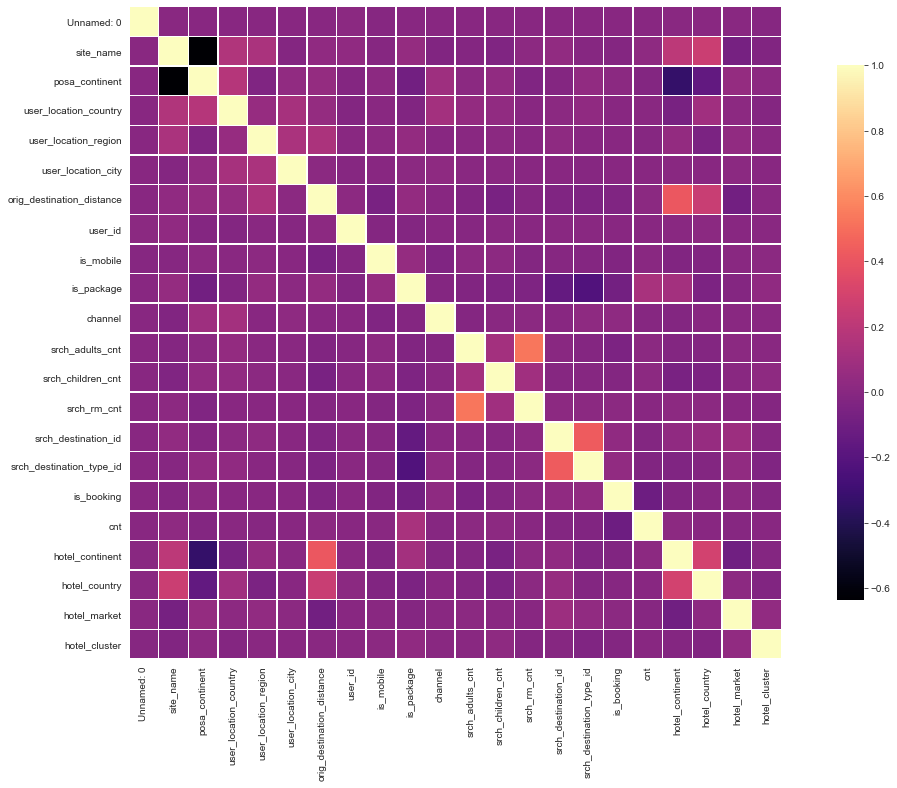

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),square=True, linewidths=.5, cbar_kws={"shrink": .82},cmap='magma')

From the figure above, we can see certain highly correlated fetaures. Some of these include orig_destination distance and the continent/country where the hotel is situated, room count with number of adults, search destination id with its id type. 

Let's perform some logic checks on the data. Firstly, we need to make sure that the number of guests is greater than 0. Secondly, we need to make sure that the check in dates are earlier than checkout dates.

In [9]:
# Number of guests grouped up
pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,173,2,3,2,0,0,0,0,0,0
1,18742,2136,523,117,11,1,9,1,2,0
2,50637,7082,6528,972,208,14,7,1,0,0
3,3645,1131,469,130,27,5,2,2,0,2
4,3932,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


We have 173 entries with no guests at all. We will remove these.

In [10]:
df.drop(df[(df['srch_adults_cnt']==0) & (df['srch_children_cnt']==0)].index)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,858268,0,0,3,2013-07-06,2013-07-10,2,0,1,762,6,0,1,2,50,503,91
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,957708,0,0,9,2013-09-30,2013-10-01,1,0,1,12843,5,0,1,2,50,661,6
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,814512,1,1,9,2014-10-17,2014-10-24,6,0,3,18773,1,0,1,6,22,1794,38
99998,25735008,2013-07-02 01:03:12,2,3,66,246,28491,207.2549,881704,0,1,4,2013-07-13,2013-07-15,2,0,1,8859,1,0,1,2,50,212,89


In [11]:
#Check in and check out dates

#Making column into datetime object
df['srch_co'] = pd.to_datetime(df['srch_co'])
df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['date_time'] = pd.to_datetime(df['date_time'])

# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
df['date'] = pd.to_datetime(df['date_time'].apply(lambda x: x.date()))

# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date
df[df['srch_co'] < df['srch_ci']][['srch_co', 'srch_ci']]
df[df['srch_ci'] < df['date']][['srch_ci', 'date']]

,srch_co,srch_ci
36906,2015-05-09,2015-08-31
44717,2013-05-27,2013-08-20


,srch_ci,date
5809,2014-01-05,2014-01-07
12310,2014-10-13,2014-10-14
19014,2014-02-11,2014-10-09
21780,2014-03-10,2014-09-15
22573,2014-09-12,2014-12-02
25056,2014-08-02,2014-08-23
30802,2013-09-20,2013-09-21
30929,2014-07-08,2014-07-29
35776,2014-12-01,2014-12-02
40107,2014-04-11,2014-10-26


Let's delete these as well.

In [12]:
df = df.drop(df[df['srch_co'] < df['srch_ci']][['srch_co', 'srch_ci']].index)
df = df.drop(df[df['srch_ci'] < df['date']][['srch_ci', 'date']].index)

Now that we have taken care of logical issues, let's look at the distributions of our columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021851C2D548>,
      dtype=object)

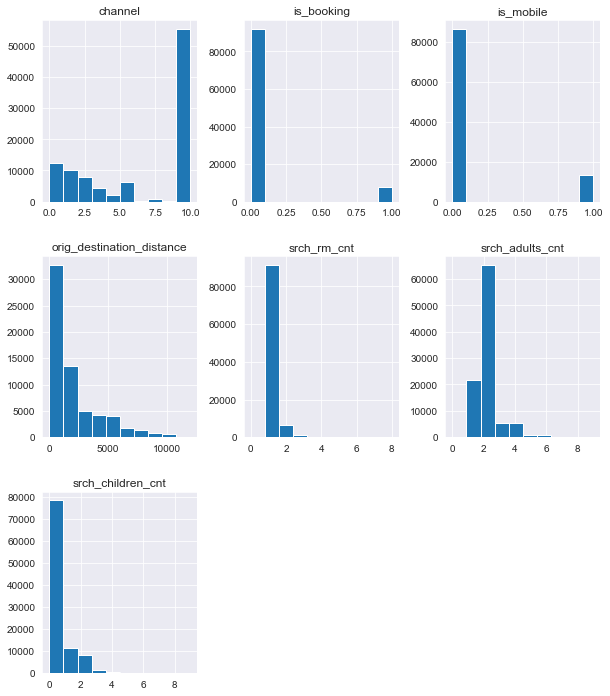

In [13]:
df[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10,12))

A few observations to note from the above graphs:
- Most bookings are coming in from channel 10
- Most of searches do not result in a booking
- Most bookings are mde on mobile (83%)
- Majority of searchers only want one room, usually are two adults and 0 children

Let's see if we have any users who made more than one booking.

In [14]:
# Consilidate by user IDs
df.groupby('user_id')['is_booking'].agg(['count']).head()

,count
user_id,
14,1
38,1
40,1
156,2
160,1


## Feature Engineering

Let's add the count of booking per user to our dataframe.

In [15]:
df = df.merge(df.groupby('user_id')['is_booking'].agg(['count']).reset_index())
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014-11-03,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2014-07-28,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,2013-03-13,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014-10-13,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013-11-05,2


Other features we can possibly add are the duration of stay as well as the days in advance the booking was made to checkin date.

In [16]:
def duration(row):
    #Gives the duration of trip and finding the time (in days) beween checkin and checkout
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    return delta

def days_in_advance(row):
    #Gives the days the trip was booked in advance
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
df['duration'] = df.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
df['days_in_advance'] = df.apply(days_in_advance, axis=1)

In [17]:
df.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,count,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014-11-03,2,4.0,42.0
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2014-07-28,2,5.0,29.0
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,2013-03-13,1,1.0,0.0
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014-10-13,1,7.0,172.0
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013-11-05,2,1.0,2.0


## Clustering

Let's start our market segmentation by using a K Means Clustering algorithm. First, we will:
- Reduce dimensionality by selecting select few features we deem as very important
- Standardize the data
- Perform K Means Clustering

In [18]:
# Selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Let's create two new dataframes with our new data called city_data and another where we do a groupby on city_data on user_location_city
city_data = df.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.000000,78.500000,2315.836250,0.000000,0.250000,1.750000,0.000000,1.0
1,3,4.294118,87.705882,3451.384159,0.058824,0.294118,1.941176,0.470588,1.0
2,7,14.000000,58.000000,5994.864000,0.000000,1.000000,2.000000,0.000000,1.0
3,14,7.000000,35.750000,5342.819100,0.000000,0.000000,2.000000,0.750000,1.0
4,21,5.000000,31.500000,2165.768900,0.000000,0.500000,1.500000,1.000000,1.0


In [39]:
#Standardizing data
city_groups_std = city_groups.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
city_groups_std = scaler.fit_transform(city_groups[features_to_explore])

In [46]:
city_groups_std = pd.DataFrame(city_groups_std,columns= features_to_explore)
city_groups_std['user_location_city'] = city_groups['user_location_city']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

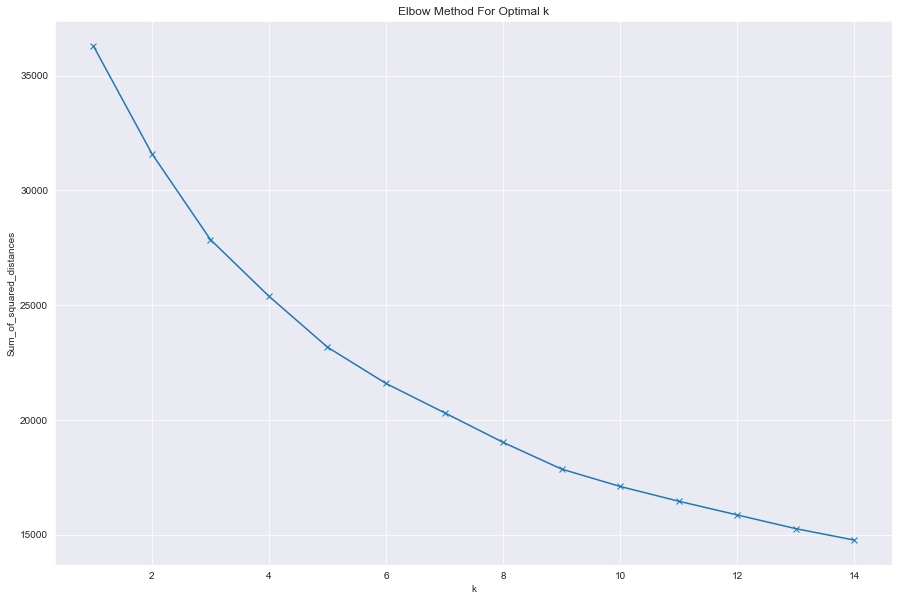

In [47]:
# Elbow method to find perfect K value
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, marker='x')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

The elbow is at K=3 so we will be using segment our customers into 3 groups.

In [48]:
km = KMeans(n_clusters=3, max_iter=300, random_state=None)
km.fit(city_groups_std[features_to_explore])
labels = km.labels_
km.cluster_centers_.shape

KMeans(n_clusters=3)

(3, 8)

In [50]:
cluster_centers = pd.DataFrame(data = km.cluster_centers_, columns = [features_to_explore])
cluster_centers

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,-0.146624,-0.023999,-0.167694,0.007142,-0.215180,3.230962,0.378056,3.605561
1,0.915965,0.992757,0.867297,-0.115775,0.749235,-0.083060,-0.075665,-0.141029
2,-0.295132,-0.326434,-0.278047,0.037858,-0.236779,-0.129672,0.006589,-0.128755


The data doesnt make a lot of sense since it has been standardized. Let's perform the inverse transform to get back our original data.

In [52]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [features_to_explore])
cluster_centers

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,9.718114,2613.546362,2.457606e+06,0.166363,0.311194,4.820421,0.666659,2.023923
1,14.317357,4790.956587,5.136468e+06,0.160040,0.400009,3.390764,0.536468,1.513879
2,9.075324,1965.872476,2.171980e+06,0.167943,0.309205,3.370655,0.560070,1.515550


To visualize our clusters, lets perfrom a Principal Component Analysis.

<Figure size 720x720 with 0 Axes>

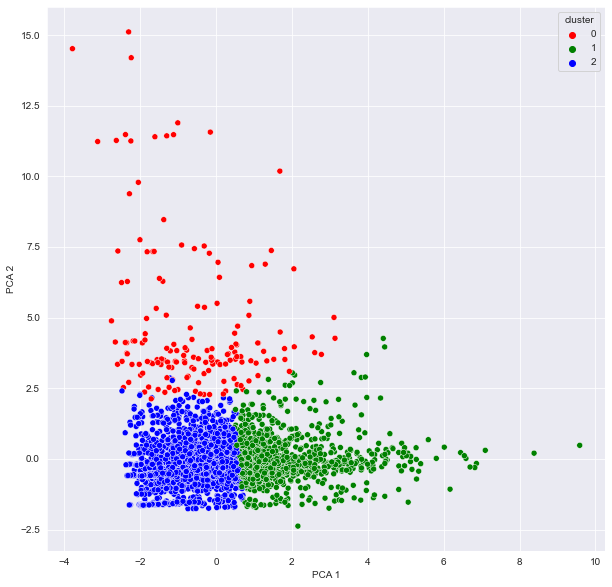

In [60]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(city_groups_std[features_to_explore])
pca_df = pd.DataFrame(principal_comp,columns=['PCA 1','PCA 2'])

#Adding clusters to the PCA table
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

#Plotting to see clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA 1", y="PCA 2", hue = "cluster", data = pca_df, palette =['red','green','blue'])

# Conclusions


Let's merge our city_groups dataset with our clusters dataframe to have our final results, then groupby clusters to get the average value for each cluster type.

In [70]:
customer_seg = city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean()
customer_seg

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,31004.743750,3.055729,55.258490,1526.469083,0.136927,0.188646,4.190312,0.565990,2.450208
1,29025.615101,5.266409,102.310526,3191.581255,0.109049,0.481314,2.013637,0.322945,1.067846
2,28020.364327,2.746765,41.262792,1348.930718,0.143893,0.182091,1.983021,0.367006,1.072374


Based on the table above, we have three customer groups characterized by the following:
- Customer Group 1: Large Groups - This group comprise of on average about 4 adults and book  rooms. They book about 2 months in advance and stay for 3 days. This group has higher chance of having a child with them.
- Customer Group 2: Long Distance travellers - This group usually stays around 5 days, but book about 100 days in advance. This might be due to the long distance travel required which usually means planning ahead. It is usually part of a package deal. Travellers in this group book in pairs.
- Customer Group 3: This group stays on average 2-3 nights and book about a month in advance,. Highest chance to book through mobile platform. They are the ones located closest to the hotels.